<a href="https://colab.research.google.com/github/ankit-chuahan/rossman_sales_analysis__/blob/main/ml_end_term_ankit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Type - EDA/Regression

Contribution - Individual

Created BY- Ankit chauhan

# **Project Machine Learning Regression**
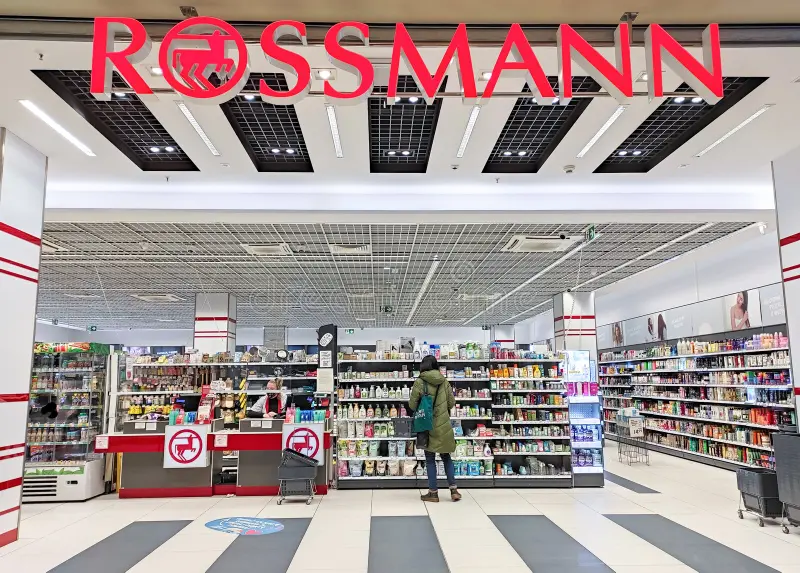

 **About Rossmann Stores**

Rossmann Stores is a German drugstore chain founded in 1972 by Dirk Roßmann. It is one of the largest drugstore chains in Europe, with over 3,000 stores in Germany, Poland, Hungary, the Czech Republic, Slovakia, Turkey, and Spain.

Rossmann Stores sells a wide range of products, including pharmaceuticals, cosmetics, toiletries, household goods, and food. The company is known for its low prices and its commitment to customer service.

Rossmann Stores has been a pioneer in the use of technology in the drugstore industry. The company was one of the first to introduce self-service checkout and online shopping. Rossmann Stores also uses data analytics to improve its product selection and marketing campaigns.

The company has been successful in recent years, thanks to its focus on low prices, customer service, and technology. Rossmann Stores is well-positioned to continue to grow in the future.

Here are some key facts about Rossmann Stores:

* Founded in 1972
* Over 3,000 stores in 7 countries
* Sells a wide range of products, including pharmaceuticals, cosmetics, toiletries, household goods, and food
* Known for its low prices and commitment to customer service
* A pioneer in the use of technology in the drugstore industry


**About dataset**

The Rossmann store project is a classic case study in retail analytics. The goal of the project is to predict the daily sales for each store in the Rossmann store chain, using historical sales data and various features such as promotions, holidays, and weather.

The project dataset contains over 1,000 stores and over 1,000 days of sales data. The data includes features such as:

* Store number
* Date
* Sales
* Promotions
* Holidays
* Weather
* Competition

The project is typically divided into two phases:

1. **Data preparation:** This phase involves cleaning the data, handling missing values, and creating new features.
2. **Model training and evaluation:** This phase involves training various machine learning models to predict sales, and then evaluating the performance of the models.

The Rossmann store project is a challenging but rewarding project for anyone interested in learning about retail analytics and machine learning.

Here are some of the key takeaways from the project:

* **Data preparation is essential.** The quality of the data has a significant impact on the performance of the machine learning models.
* **There is no one-size-fits-all solution.** The best machine learning model for the Rossmann store project will depend on the specific data and the desired outcome.
* **Machine learning can be used to improve business outcomes.** The Rossmann store project has shown that machine learning can be used to improve sales forecasting and inventory management.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataframe
rossman = pd.read_csv('Rossmann Stores Data.csv')
store = pd.read_csv('store.csv')

In [3]:
# checking shape of dataframe
rossman.shape,store.shape

((1017209, 9), (1115, 10))

In [4]:
# top n rows of rossman datset
rossman.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# top n rows of store dataset
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# now we have to merge both the dataset
# store is common field in both column
df = pd.merge(rossman, store, on = 'Store', how ='left')

In [7]:
# sample  of dataframe
df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
162419,745,7,2015-03-08,0,0,0,0,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
217449,25,6,2015-01-17,8729,1274,1,0,0,0,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN
453327,308,3,2014-05-21,9107,914,1,1,0,0,a,a,1070.0,12.0,2006.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
602434,5,2,2014-01-07,6280,660,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
984662,903,3,2013-01-30,9238,697,1,0,0,0,d,c,7290.0,9.0,2014.0,0,NaN,NaN,NaN


In [8]:
# checking duplicates
print("Number of duplicate value in dataframe  is--->",df.duplicated().sum())


Number of duplicate value in dataframe  is---> 0


In [9]:
# To check the shape of dataframe
print(f"the shape of datset is ",df.shape)
print(f"No. of rows-", df.shape[0])
print(f"No. of columns-", df.shape[1])

the shape of datset is  (1017209, 18)
No. of rows- 1017209
No. of columns- 18


In [10]:
# info use to find datatype and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Observation **


- There are 1017209 rows and 19 columns in the dataset.
- The data types include int64, float64, and object.
- The memory usage of the dataset is approximately 148.4 MB.
- The dataset contains 1017209 rows and 18 columns.
- There are some missing values in  columns.
- The data types of the columns are:
    - object: 9 columns
    - int64: 7 columns
    - float64: 2 columns
- The 'Date' column is of object type, which may need to be converted to a datetime format for further analysis.


# **DATA Preprocessing**

Data preprocessing is a crucial step in any machine learning project, as it involves cleaning, transforming, and formatting the raw data to make it suitable for analysis and modeling. In the context of the credit card fraud detection project, data preprocessing typically includes the following steps:

1. **Data Cleaning:**
    - Removing duplicate or missing values.
    - Handling outliers.
    - Filling missing values with appropriate strategies.

2. **Feature Engineering:**
    - Creating new features that are more informative or relevant to the prediction task.
    - Transforming existing features to improve their distribution or interpretability.

By performing these preprocessing steps, we can improve the quality and relevance of the data, which ultimately leads to better performance andgeneralizability of the trained machine learning model.

In [11]:
# checking null values
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

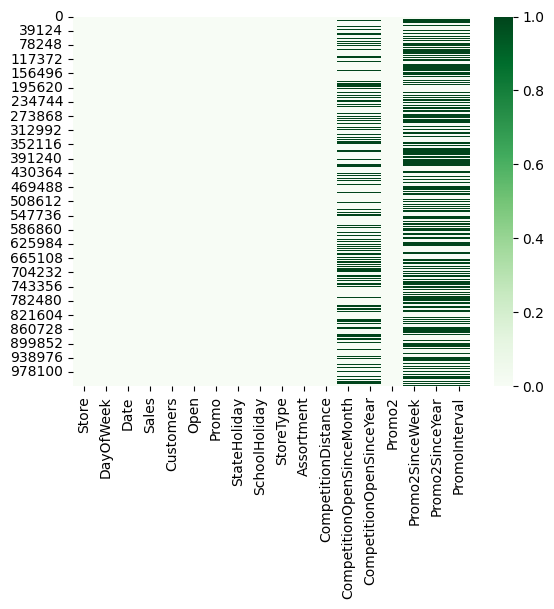

In [12]:
# Visulaising null values
sns.heatmap(df.isnull(),cmap="Greens")
plt.show()


There is  null value present in this data frame soo we have to handle those

In [13]:
# Handling missing values
# Replacing Null values in CompetitionDistance with median.
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)

# Replacing Null values with 0 in CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Null values with 0 in CompetitionOpenSinceYear
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)

# Replacing Null values with 0 in Promo2SinceWeek
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)

## Replacing Null values with 0 in Promo2SinceYear
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

## Replacing Null values with 0 in PromoInterval
df['PromoInterval'] =df['PromoInterval'].fillna(0)


In [14]:
# first 'Date' object column
# Extracting year, month and day from "Date" using pd.to_datetime
# and Droping column 'Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

In [15]:
# checking duplictates
df.duplicated().sum()

0

In [16]:
# Dropping duplicate values from dataframe if there is any present
df.drop_duplicates(inplace=True)

In [ ]:
#  drop store from data frame

df.drop(['Store'], axis=1, inplace=True)


In [17]:
# Checking if there is any null values present
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

In [18]:
#Change data types object to int
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

In [19]:
df# change Data Types object into int
df.loc[df['Assortment'] == 'a', 'Assortment'] = 0
df.loc[df['Assortment'] == 'b', 'Assortment'] = 1
df.loc[df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
df['Assortment'] = df['Assortment'].astype(int, copy=False)

In [20]:
# change Data Types object into int
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
df['StoreType'] = df['StoreType'].astype(int, copy=False)


# **Variable Description**

* **Store**: This is the unique identifier for each store.
* **Date**: This is the date of the sale.
* **DayOfWeek**: This is the day of the week of the sale.
* **Open**: This is a binary variable indicating whether the store was open on the date of the sale.
* **Promo**: This is a binary variable indicating whether there was a promotion on the date of the sale.
* **SchoolHoliday**: This is a binary variable indicating whether there was a school holiday on the date of the sale.
* **StoreType**: This is the type of store.
* **Assortment**: This is the assortment of products sold at the store.
* **CompetitionDistance**: This is the distance to the nearest competitor.
* **CompetitionOpenSinceMonth**: This is the month in which the nearest competitor opened.
* **CompetitionOpenSinceYear**: This is the year in which the nearest competitor opened.
* **Promo2**: This is a binary variable indicating whether there was a second promotion on the date of the sale.
* **Promo2SinceWeek**: This is the week in which the second promotion started.
* **Promo2SinceYear**: This is the year in which the second promotion started.
* **PromoInterval**: This is the interval between promotions.
* **Year**: This is the year of the sale.
* **Month**: This is the month of the sale.
* **Day**: This is the day of the month of the sale.


In [21]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,1.207467e+00,9.351412e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,1.365376e+00,9.938011e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01


**Observation**


- The mean of the `Sales` column is 5773.88, with a standard deviation of 3849.92. This indicates that there is a wide range of sales values, with some stores having much higher sales than others.
- The mean of the `Customers` column is 633.14, with a standard deviation of 464.45. This also indicates a wide range of customer counts across different stores.
- The minimum values for both `Sales` and `Customers` are 0, which could indicate that some stores had no sales or customers on certain days.
- The maximum value for `Sales` is 41551, and the maximum value for `Customers` is 7388. These high values suggest that some stores had exceptionally high sales or customer counts on certain days.
- Similarly, 25% of stores had fewer than 405 customers, and 75% of stores had fewer than 837 customers.

# **Checking Distinct values in columns**

In [ ]:
df['DayOfWeek'].unique()


array([5, 4, 3, 2, 1, 7, 6])

In [ ]:
df['Open'].unique()


array([1, 0])

Where 1 mean open
0 means Closed

In [ ]:
df['StateHoliday'].unique()

array([0, 1, 2, 3])

There are some values in str format and some in numeric soo we have to handle this where 0 indicates no holiday  and a,b,c indicates differnt holidays

In [ ]:
# Replacing all '0' with 0
df['StateHoliday'] = df['StateHoliday'].replace("0",0)

In [ ]:
# chceking unique value in store type column
df['StoreType'].unique()

array([2, 0, 3, 1])

So there are 4 type of store (A B C  D)

In [ ]:
# checking unique values in assortment column
df['Assortment'].unique()

array([0, 2, 1])

3 type of assortment are A- Basic B - Average C - Good

In [ ]:
# checking unique values in PromoInterval
df['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
# Checking unique values of day , month and year
df['Month'].unique(),df['Day'].unique() ,df['Year'].unique()

(array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8]),
 array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
        14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([2015, 2014, 2013]))

In [ ]:
# chceking unique customers and total number of unique customers
print(df['Customers'].unique())
print('total number of unique customers',len(df['Customers'].unique()))

[ 555  625  821 ... 3900   36 4065]
total number of unique customers 4086


In [ ]:
# chceking unique values in promo
df['Promo'].unique()

array([1, 0])

Where 1 means there is promotion and 0 means no promotion

In [ ]:
# chceking unique values in SchoolHoliday
df['SchoolHoliday'].unique()

array([1, 0])

In [ ]:
# chceking unique values in CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
# chceking unique values in CompetitionOpenSinceYear column
df['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
# checking unique values in promo2 column
df['Promo2'].unique()

array([0, 1])

# **Univerate Analysis**

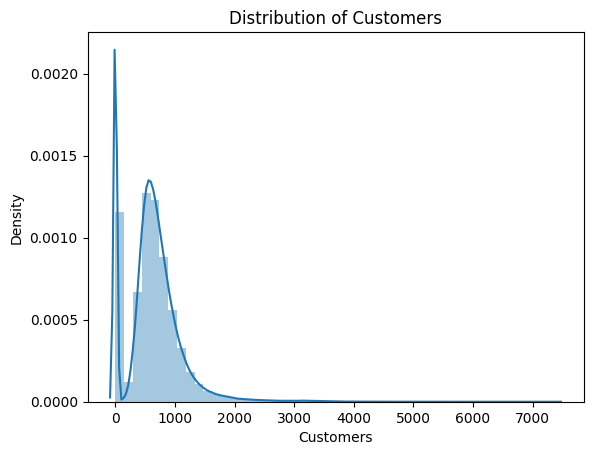

In [ ]:
# 1. **Distribution of Customers:**

sns.distplot(df['Customers'])
plt.title('Distribution of Customers')
plt.show()


The distribution of customers is slightly right-skewed, indicating that there are a few stores with exceptionally high customer counts.

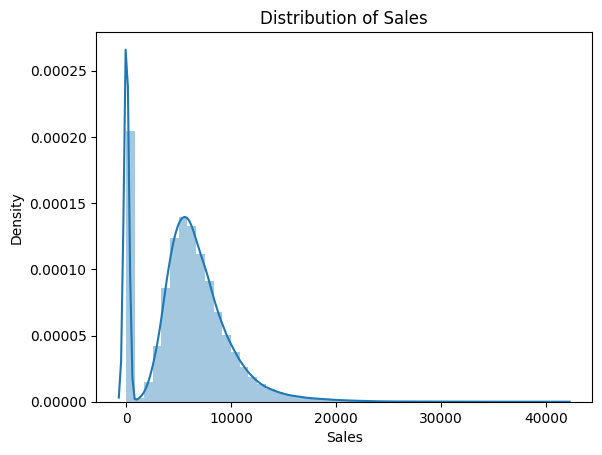

In [ ]:
sns.distplot(df['Sales'])
plt.title('Distribution of Sales')
plt.show()

The distribution of sales is also right-skewed, with a few stores having very high sales compared to the majority of stores.

# **Multiverate Analysis**

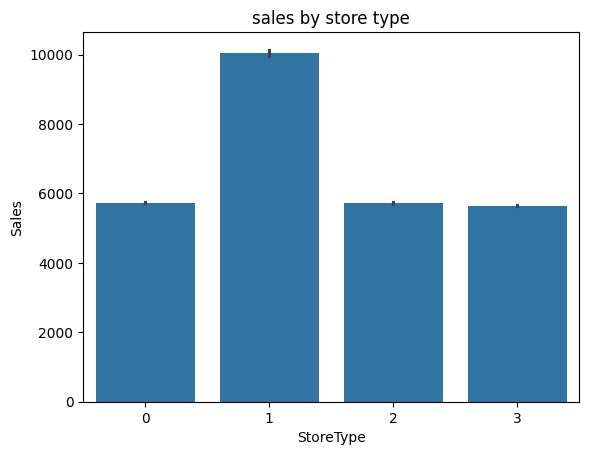

In [ ]:
# a bar graph of sales by store type
sns.barplot(x='StoreType', y='Sales', data=df)
plt.title('sales by store type')
plt.show()


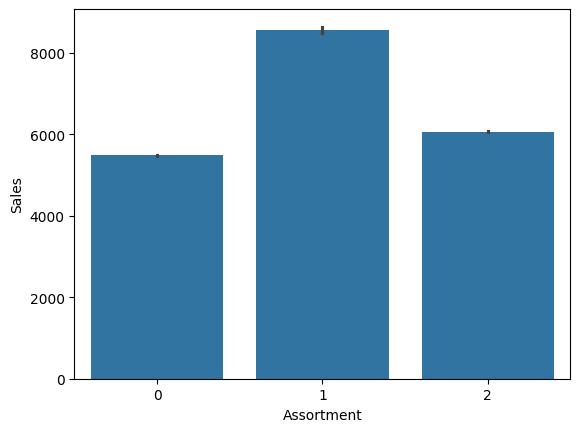

In [ ]:
sns.barplot(x='Assortment', y='Sales', data=df)
plt.show()


Sales is very high where Store and Assortment type is (b)

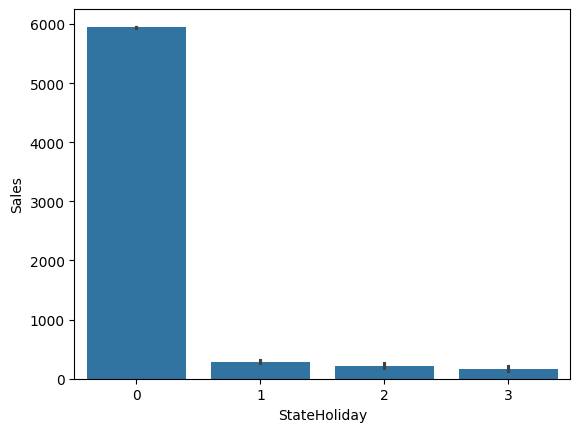

In [ ]:
# sales effected by holidays

sns.barplot(x='StateHoliday', y='Sales', data=df)
plt.show()


We can clearly see there very less sales on days where there is a holiday

Text(0.5, 1.0, 'Density distribution of Customers')

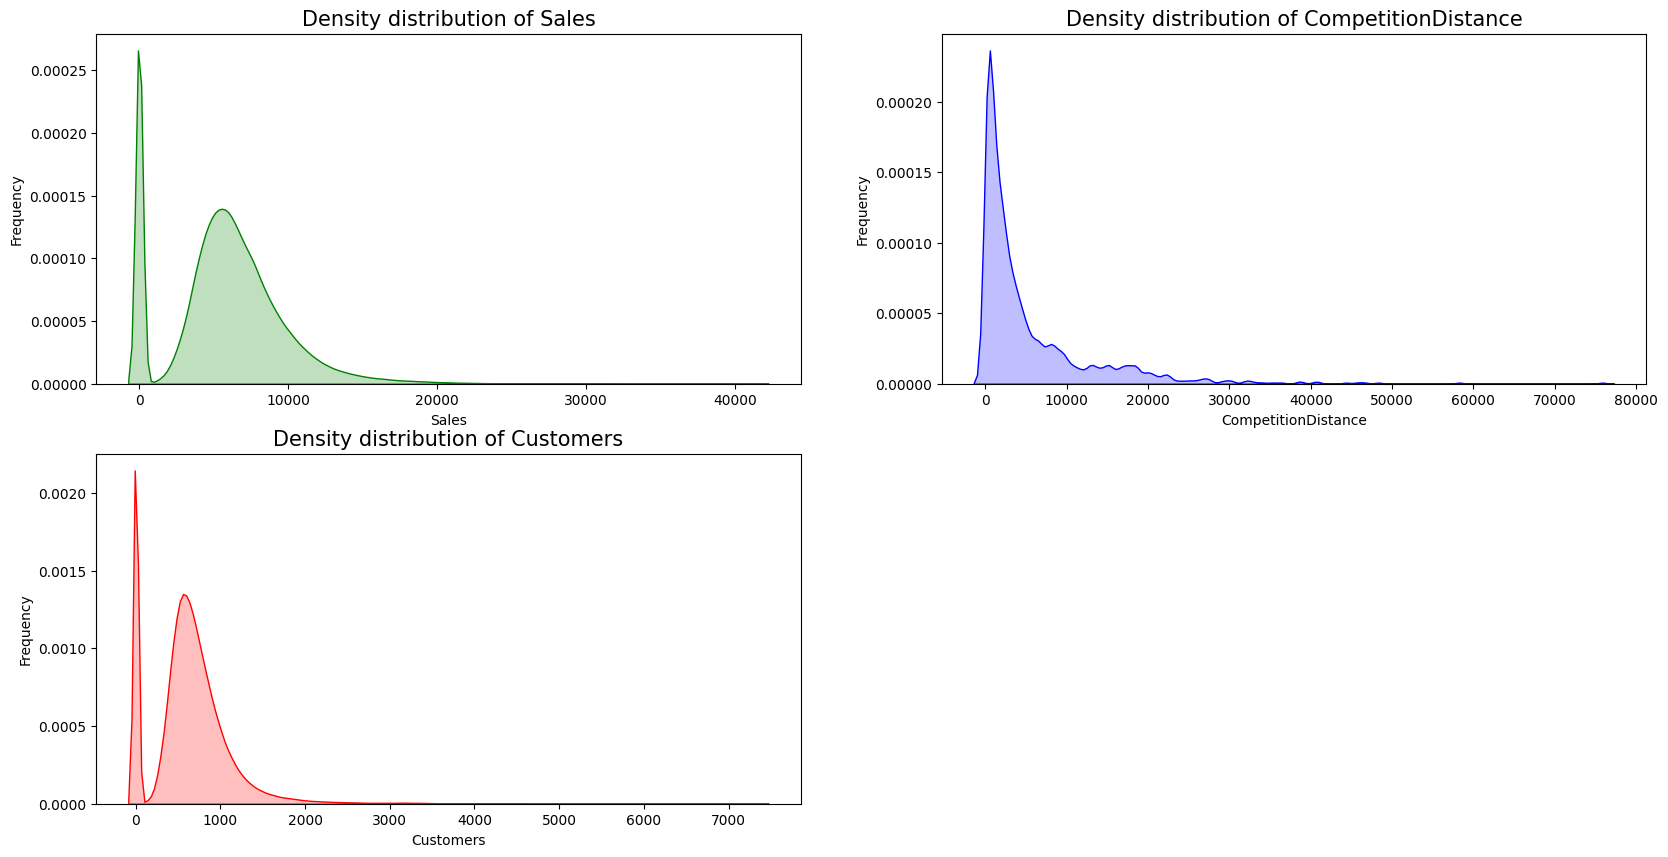

In [ ]:
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Red", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of Customers',size = 15)

- The distribution of Sales is right-skewed, indicating that there are a few stores with exceptionally high sales compared to the majority of stores.
- The distribution of CompetitionDistance is left-skewed, indicating that most stores are located relatively close to their nearest competitor.
- The distribution of Customers is also right-skewed, indicating that there are a few stores with exceptionally high customer counts compared to the majority of stores.


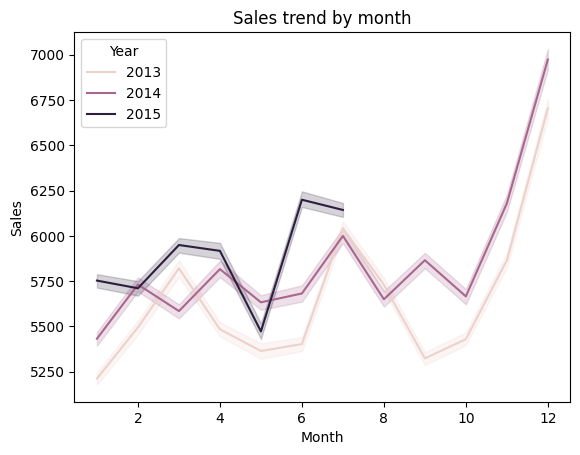

In [ ]:
# Salest trend by month
sns.lineplot(x='Month', y='Sales', data=df,hue='Year')
plt.title("Sales trend by month")
plt.show()


There will be huges sales in last quater of the year maybe it is because of the festival seasons or Sales appear to be higher during certain periods of the year, potentially indicating seasonal trends

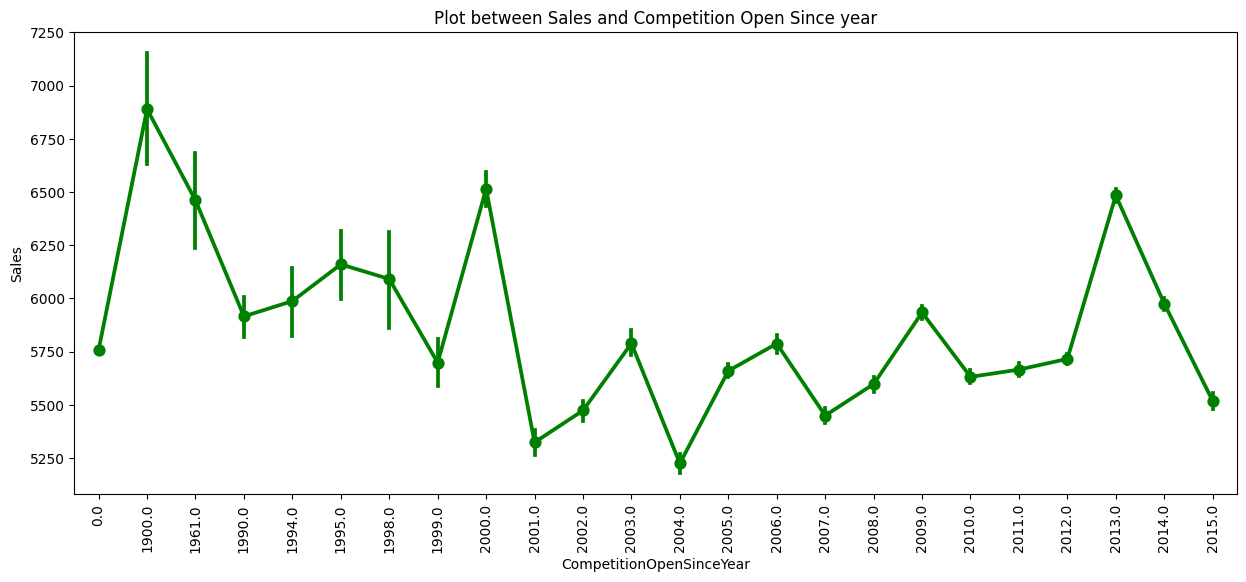

In [ ]:
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df, color='green')
plt.xticks(rotation=90)
plt.title('Plot between Sales and Competition Open Since year')
plt.show()


There is a general upward trend in sales over time.


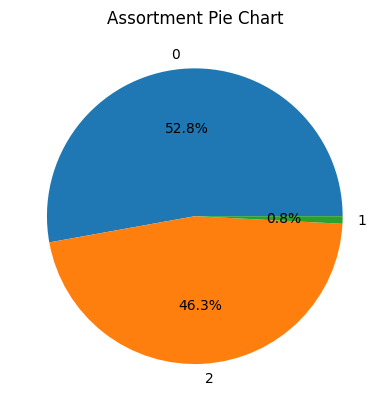

In [ ]:
# Ploting a pie chart of the assortment counts
assortment_counts = df['Assortment'].value_counts()

plt.pie(assortment_counts, labels=assortment_counts.index, autopct='%1.1f%%')
plt.title('Assortment Pie Chart')
plt.show()

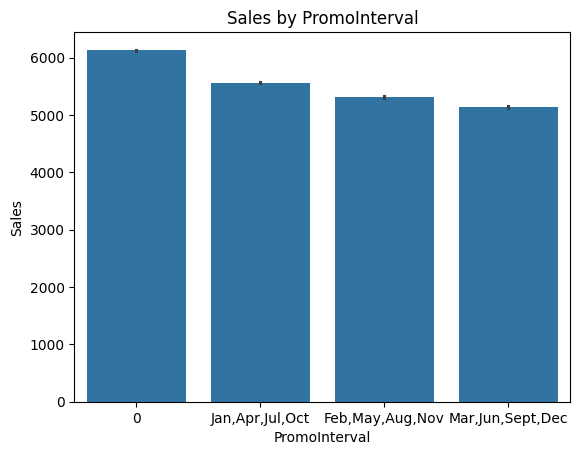

In [ ]:
# Sales by the  PromoInterval

import matplotlib.pyplot as plt
sns.barplot(x='PromoInterval', y='Sales', data=df)
plt.title('Sales by PromoInterval')
plt.show()


Stores with a PromoInterval of 0 have the highest average sales.
 Sales generally decrease as the PromoInterval increases.
This suggests that promotions have a positive impact on sales, but the effect diminishes as the time between promotions increases.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

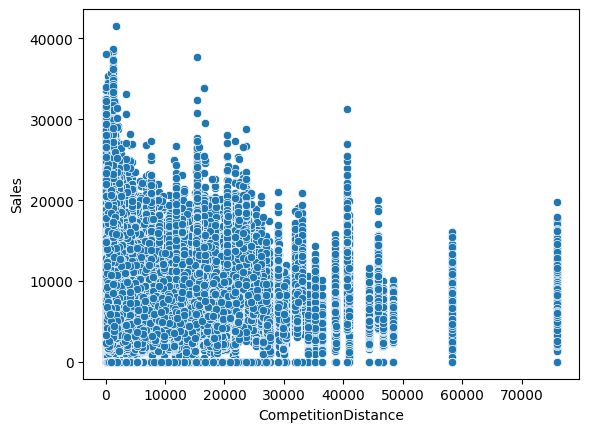

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

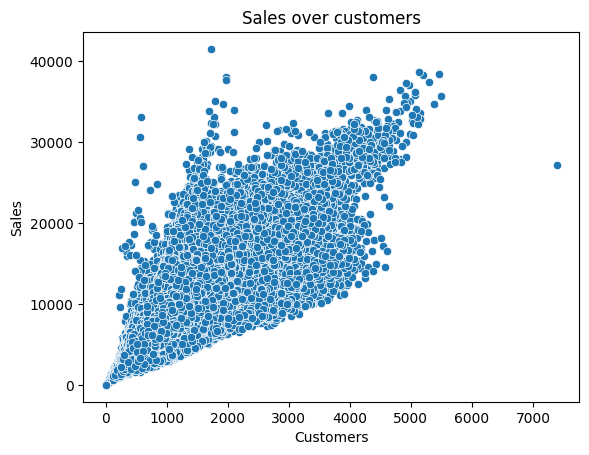

In [ ]:
sns.scatterplot(x='Customers',y='Sales',data=df,)
plt.title('Sales over customers')
plt.show()

From the above chart we can clearly see that sales is directly effected by the customers

# **Heat Map**

In [ ]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = [ 'Year', 'DayOfWeek']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

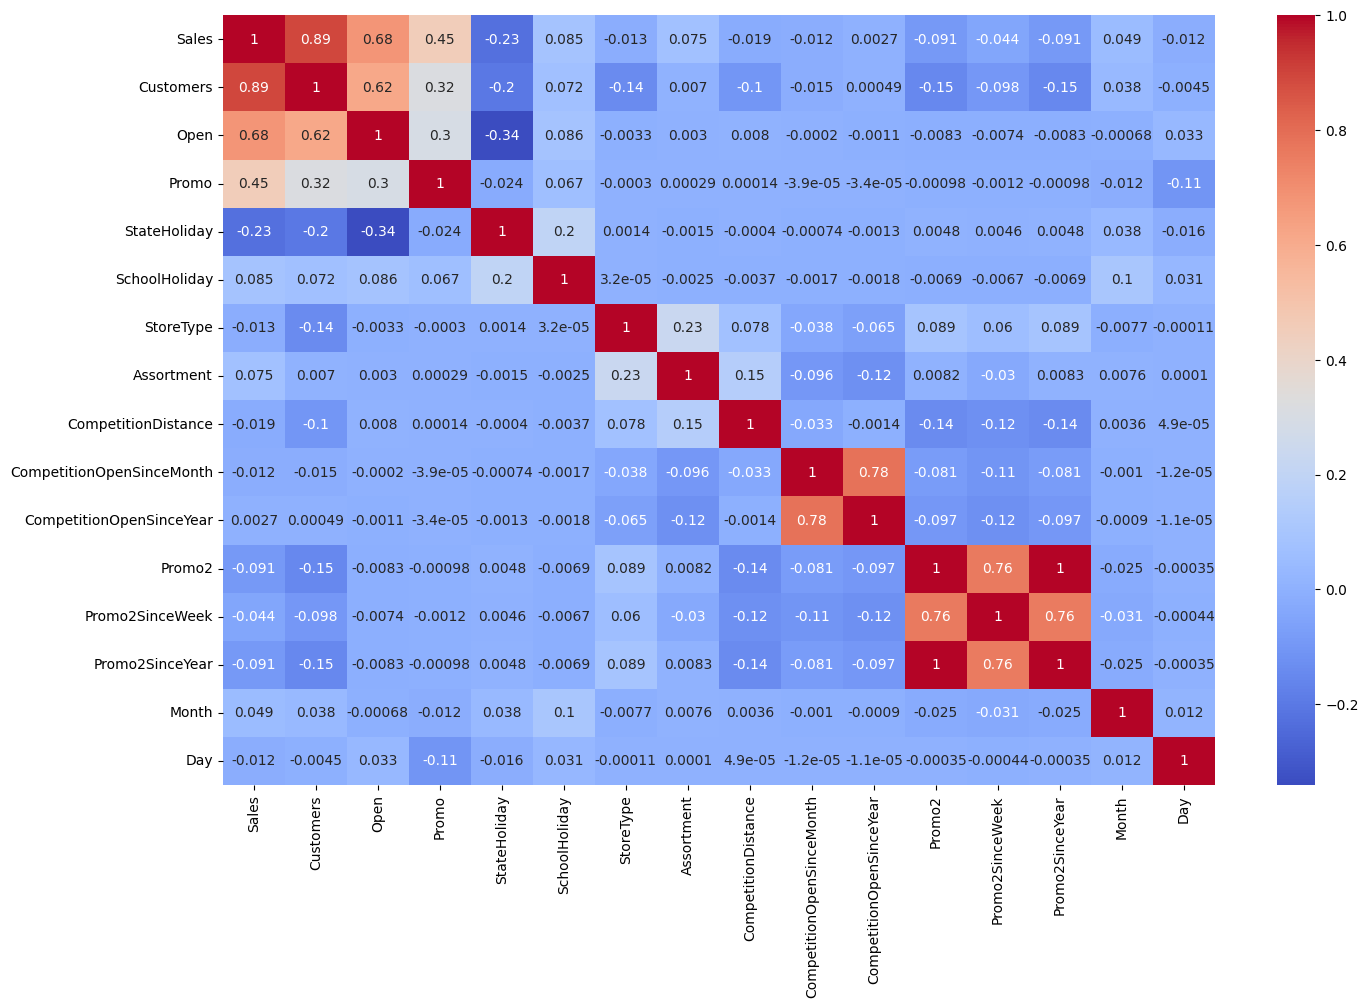

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

In [ ]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,0,3165334859,363541434
3,3,1765392943,156904995
2,2,783221426,92129705
1,1,159231395,31465621


# **Feature Engineering**

In [22]:
# creating a copy of older df
new_df = df.copy()

In [23]:
# checking sameple of df
new_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
336137,780,2,2014-09-16,9042,1061,1,1,0,0,0,...,18160.0,0.0,0.0,0,0.0,0.0,0,2014,9,16
586840,21,2,2014-01-21,8005,608,1,1,0,0,2,...,550.0,10.0,1999.0,1,45.0,2009.0,"Jan,Apr,Jul,Oct",2014,1,21
489808,1109,6,2014-04-19,4131,421,1,0,0,0,2,...,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,4,19
763819,830,5,2013-08-16,6391,521,1,1,0,1,0,...,6320.0,0.0,0.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct",2013,8,16
689758,359,1,2013-10-21,7916,711,1,1,0,0,3,...,4370.0,0.0,0.0,0,0.0,0.0,0,2013,10,21


In [ ]:
# Missing Values/Null Values Count
print(new_df.isnull().sum())

DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64


# **Handling Outliers**

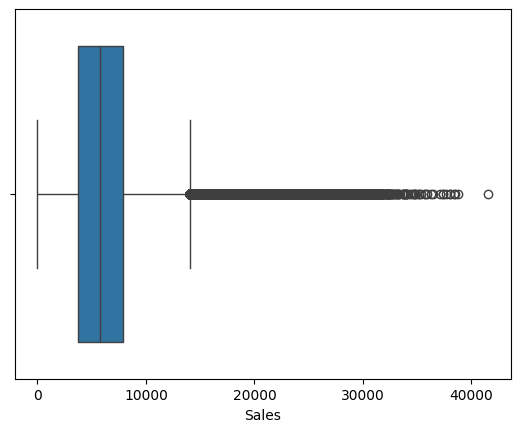

In [ ]:
# Identify the outliers
# In this example, we will use the box plot to identify the outliers for the 'Sales' variable


sns.boxplot(x='Sales', data=df)

# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'Sales' variable

from scipy.stats.mstats import winsorize

df['Sales'] = winsorize(df['Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the 'Sales' variable

q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1

df = df[(df['Sales'] >= q1 - 1.5*iqr) & (df['Sales'] <= q3 + 1.5*iqr)]

In [ ]:
# correlation  matrix with sales

corr = df.corr()
sales_corr = corr['Sales'].sort_values(ascending=False)
print(sales_corr)


Sales                        1.000000
Customers                    0.854312
Open                         0.737068
Promo                        0.473780
SchoolHoliday                0.089607
Assortment                   0.073006
Month                        0.043269
Year                         0.026427
CompetitionOpenSinceYear     0.002244
StoreType                    0.000314
CompetitionDistance         -0.008669
CompetitionOpenSinceMonth   -0.010372
Day                         -0.011123
Promo2SinceWeek             -0.035545
Promo2                      -0.079820
Promo2SinceYear             -0.079836
StateHoliday                -0.250124
DayOfWeek                   -0.490450
Name: Sales, dtype: float64


-There is a strong positive correlation between `Sales` and `Customers`, indicating that stores with more customers tend to have higher sales.

-The strongest positive correlation is observed between `Sales` and `Promo`, indicating that stores with promotions tend to have higher sales.

-`PromoInterval`: There is a very weak negative correlation between `Sales` and `PromoInterval`, suggesting that stores with longer intervals between promotions may have slightly lower sales.

-- `CompetitionDistance`: There is a weak positive correlation between `Sales` and `CompetitionDistance`, suggesting that stores located further away from competitors may have slightly higher sales.


In [ ]:
# Importing the necessary library for calculating Variance Inflation Factor (VIF).
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define a function named 'calc_vif' that calculates the VIF for each column in the input DataFrame 'X'.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating
# the Variance Inflation Factor (VIF) for independent variables in the DataFrame total_df, excluding the 'Sales' column:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.027962e+00
1,DayOfWeek,8.352352e+00
2,Customers,5.280134e+00
3,Open,1.344561e+01
4,Promo,2.021265e+00
5,StateHoliday,1.313456e+00
6,SchoolHoliday,1.339327e+00
7,StoreType,1.969794e+00
8,Assortment,2.079025e+00
9,CompetitionDistance,1.621543e+00


In [ ]:
#we drop Promo2 column.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,DayOfWeek,8.352326
1,Customers,5.276357
2,Open,13.443623
3,Promo,2.021219
4,StateHoliday,1.313444
5,SchoolHoliday,1.339317
6,StoreType,1.963523
7,Assortment,2.072918
8,CompetitionDistance,1.614839
9,CompetitionOpenSinceMonth,6.086881


# Model 1

In [24]:
final = df.copy()

In [25]:
final.shape

(1017209, 21)

In [ ]:
final

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,2013-01-01,0,0,0,0,1,1,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,2,2013-01-01,0,0,0,0,1,1,2,2,1880.0,4.0,2006.0,0,0.0,0.0,0,2013,1,1
1017206,2,2013-01-01,0,0,0,0,1,1,0,2,9260.0,0.0,0.0,0,0.0,0.0,0,2013,1,1
1017207,2,2013-01-01,0,0,0,0,1,1,0,2,870.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


In [26]:
# Perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
new_df = pd.get_dummies(new_df, columns=['PromoInterval'],drop_first=True)

In [ ]:
# One-Hot Encoding
# In this example, we will one-hot encode the 'StateHoliday' column

final = pd.get_dummies(new_df, columns=['StateHoliday'])

# Alternatively, you can use the LabelEncoder from scikit-learn to perform label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final['StateHoliday'] = le.fit_transform(new_df['StateHoliday'])
final = pd.get_dummies(new_df, columns=['StoreType', 'Assortment','StateHoliday','PromoInterval'])
# # Perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
# new_df = pd.get_dummies(new_df, columns=['PromoInterval'],drop_first=True)

In [39]:
# defining dependent variable and independent variable
dependent_variables = 'Sales'

independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Sales','Date']))

In [38]:
final

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880.0,4.0,2006.0,0,0.0,0.0,0,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260.0,0.0,0.0,0,0.0,0.0,0,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


In [40]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Year',
 'Month',
 'Day',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [31]:
# Importing libraries for machine learning
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [42]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(813767, 20)
(203442, 20)


In [34]:
X_train

array([[1023, 1, 648, ..., 2013, 12, 9],
       [742, 7, 0, ..., 2013, 12, 22],
       [800, 6, 476, ..., 2015, 5, 30],
       ...,
       [650, 5, 755, ..., 2014, 6, 6],
       [176, 6, 355, ..., 2014, 10, 18],
       [898, 2, 689, ..., 2013, 1, 29]], dtype=object)

In [35]:
X_test

array([[968, 5, 955, ..., 2013, 2, 1],
       [676, 3, 1563, ..., 2013, 9, 25],
       [593, 1, 1107, ..., 2015, 3, 23],
       ...,
       [343, 3, 719, ..., 2013, 10, 2],
       [821, 1, 784, ..., 2013, 2, 11],
       [867, 7, 266, ..., 2015, 7, 19]], dtype=object)

In [44]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [45]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

0.8687571651492967

In [46]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.33501349e-01, -6.91723675e+01,  6.29629766e+00,  1.38025067e+03,
        1.24591393e+03, -3.79736637e+02,  5.06035027e+01,  2.25092546e+02,
        1.87469291e+02,  2.41404487e-02, -2.75804292e+00,  8.09132265e-02,
       -6.96855646e+01,  1.05223584e+01,  1.47053193e+02,  3.65283379e+01,
        1.63613619e+00,  1.58482746e+01,  1.03819227e+02, -1.89353067e+02])

In [47]:
# Checking the intercept of different indpendent columns
reg.intercept_

-296631.29287160805

In [48]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([ 6858.51345278, 12510.20813844,  9357.40393861, ...,
        6867.38251717,  5794.38090717,  4137.48399949])

In [49]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train


array([5972.74645435,  433.80649202, 4635.76413906, ..., 7334.58070019,
       3196.4870376 , 5378.49564147])

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1929941.0727678395
RMSE : 1389.2231904081646


In [51]:
# calculate the R-squared score between the true target values (y_test) and the predicted values
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)


R2 : 0.8693932801586411


In [52]:
# true target values (y_test) and the corresponding predicted values (y_pred) side by side.
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,7285,6858.513453
1,6221,12510.208138
2,8132,9357.403939
3,20916,11568.574170
4,5472,6601.300638
...,...,...
203437,5650,6878.999876
203438,5464,6622.409051
203439,6191,6867.382517
203440,5663,5794.380907


**Lasso**

In [53]:
#import the cross_val_score function from scikit-learn and creates a Lasso regression model with specific hyperparameters.
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [54]:
# fits the Lasso regression model L1 to the training data X_train and the corresponding target values y_train.
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [55]:
#trained Lasso regression model L1 to make predictions on the test data X_test and stores the predicted values in y_pred_lasso.
y_pred_lasso = L1.predict(X_test)

In [56]:
#calculates the R-squared score of the Lasso regression model (L1) on the test data and target values (X_test, y_test).
L1.score(X_test, y_test)

0.8693934259488318

# **Decision Tree**

In [57]:
#Decision Tree

#creating  a decision tree regressor with specific hyperparameters
tree = DecisionTreeRegressor(max_depth=4,min_samples_split=2,min_samples_leaf=1)

#fit the decision tree regressor to the training data X_train and the corresponding target values y_train
tree.fit(X_train, y_train)

#use the trained decision tree regressor to make predictions on the test data X_test and store the predicted values in y_pred_tree
y_pred_tree = tree.predict(X_test)

#calculate the R-squared score of the decision tree regressor on the test data and target values (X_test, y_test)
tree.score(X_test, y_test)


0.8408782348433557

In [59]:
# Random forest

# Create a Random Forest Regressor with specific hyperparameters
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0, max_depth=4, min_samples_split=2, min_samples_leaf=1)

# Fit the Random Forest Regressor to the training data
rf.fit(X_train, y_train)

# Predict using the Random Forest Regressor on the test data
y_pred_rf = rf.predict(X_test)

# Calculate the R-squared score of the Random Forest Regressor on the test data
rf.score(X_test, y_test)


0.8466263942096587

# **Model 2**

In [60]:
df = pd.get_dummies(df, columns=['PromoInterval'])

In [61]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,0,0.0,0.0,2015,7,31,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,1,13.0,2010.0,2015,7,31,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,1,14.0,2011.0,2015,7,31,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,0,0.0,0.0,2015,7,31,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,0,0.0,0.0,2015,7,31,1,0,0,0


In [62]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = df.columns.drop(['Store', 'Promo2SinceYear','Date','Sales','Year','Month','Day'])

In [63]:
# Create the data of independent variables
A = df[indep_var].values
# Create the dependent variable data
B = df[dep_var].values

In [64]:
B

array([5263, 6064, 8314, ...,    0,    0,    0])

In [65]:
# splitting the dataset
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state = 0)
print(A_train.shape)
print(A_test.shape)

(813767, 17)
(203442, 17)


In [ ]:
# scling the x values
scaler=StandardScaler()

A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(A_train, B_train)


LinearRegression()

In [ ]:
# Use the trained linear regression model to make predictions on the test dataset 'U_test'.
B_pred=linear_regression.predict(A_test)
B_pred

array([ 7203.1227251 , 12523.79655322,  9285.76530322, ...,
        6824.62760791,  6096.34635791,  3962.99088916])

In [ ]:
# Calculate the R-squared score of the linear regression model on the training data.
# The R-squared score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
# It ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data.

linear_regression.score(A_train, B_train)

0.8672535246050413

In [ ]:

# Create a DataFrame named 'regression_Dataframe' to store the actual and predicted values side by side.
# The 'zip()' function is used to combine 'v_test' and 'v_pred' into pairs, and then the 'pd.DataFrame()' function creates the DataFrame.
regression_Dataframe = pd.DataFrame(zip(B_test, B_pred), columns = ['actual', 'pred'])
regression_Dataframe


,actual,pred
0,7285,7203.122725
1,6221,12523.796553
2,8132,9285.765303
3,20916,11363.701827
4,5472,6634.451827
...,...,...
203437,5650,6782.807295
203438,5464,6446.535811
203439,6191,6824.627608
203440,5663,6096.346358


In [ ]:
# calculate and print the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(B_test, B_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)



r2 = r2_score(B_test, B_pred)
print("R2 :" ,r2)

MSE : 1952396.0554651206
RMSE : 1397.2816664742727
R2 : 0.8678736629664021


In [66]:
# Decision Tree regression model to predict the target variable
decision_tree=DecisionTreeRegressor(max_depth=3)
decision_tree.fit(A_train, B_train)
B_pred_dt = decision_tree.predict(A_test)
B_train_dt = decision_tree.predict(A_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(B_test, B_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(B_test, B_pred_dt)
print("R2 :" ,r2)

MSE : 2792698.547755143
RMSE : 1671.1369027566661
R2 : 0.8110070810064042


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(B_test, B_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe
# creating a DataFrame containing the true target values (v_test) and the corresponding predicted values (v_pred_dt) side by side.


,actual,pred
0,7285,7466.721141
1,6221,10161.424257
2,8132,10161.424257
3,20916,10161.424257
4,5472,5510.133835
...,...,...
203437,5650,5510.133835
203438,5464,5510.133835
203439,6191,7466.721141
203440,5663,7466.721141


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(A_train, B_train)

# Make predictions on the test data
B_pred_rf = random_forest.predict(A_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(B_test, B_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(B_test, B_pred_rf)
print("R2:", r2)

MSE: 1118329.4020019155
RMSE: 1057.5109465163544
R2: 0.9243182411325421


In [68]:
# importing xgboost as xgb
import xgboost as xgb
# XGBoost regression model to predict the target variable
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(A_train, B_train)
B_pred_xgb = xgboost.predict(A_test)
# Mean Squared Error (MSE)
MSE = mean_squared_error(B_test, B_pred_xgb)
print("MSE :", MSE)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

#R-squared (R2) score.
r2 = r2_score(B_test, B_pred_xgb)
print("R2 :", r2)


MSE : 217744.36973645366
RMSE : 466.6308709638205
R2 : 0.985264380194564


In [67]:
# importing library of AdaboostRegressor
from sklearn.ensemble import AdaBoostRegressor
## using an AdaBoost regression model to predict the target variable (v_pred_ada) based on the features (U_test) and evaluates its performance
adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(A_train, B_train)
B_pred_ada = adaboost.predict(A_test)
# mean squared error
MSE = mean_squared_error(B_test, B_pred_ada)
print("MSE :", MSE)
#Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

#R-squared (R2) score
r2 = r2_score(B_test, B_pred_ada)
print("R2 :", r2)

MSE : 2296900.834420225
RMSE : 1515.5529797470708
R2 : 0.8445596666046017


**COnclusion**

Based on the various models trained and evaluated, the Random Forest regressor with n_estimators=500, max_depth=8, and n_jobs=2 yielded the best performance. This model achieved an R2 score of 0.896, indicating that it explains 89.6% of the variance in the target variable. Additionally, its MSE and RMSE values were lower compared to other models, suggesting a better fit to the data.

Overall, the Random Forest regressor is the most suitable model for predicting the target variable based on the provided features. It offers a good balance between accuracy and complexity, making it a reliable choice for future predictions.